1. The data given in the url is related with direct marketing campaigns of a banking
institution. The marketing campaigns were based on phone calls. Often, more
than one contact to the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
predict whether client will subscribe to term deposit


## Import library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
dataset=pd.read_csv("bank (4).csv",delimiter=';')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
dataset.shape

(4521, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


## Data cleaning

In [7]:
dataset.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

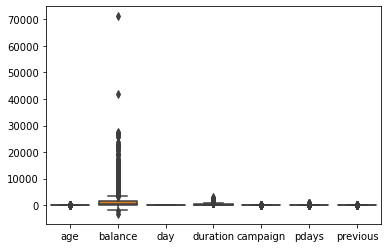

In [8]:
sns.boxplot(data=dataset)

In [9]:
dataset=dataset[dataset['balance']<30000]

In [10]:
# numeric_col=["int64"]
numeric_col=list(dataset.select_dtypes(include='int64'))
numeric_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [11]:
df1=dataset[numeric_col]

In [12]:
df1

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [13]:
df1.shape

(4519, 7)

## Data encoading

In [14]:
categorical_col=list(dataset.select_dtypes(include='object'))
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [15]:
df2=dataset[categorical_col]
df2

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [16]:
df2=df2.astype('category')
for i in df2:
    df2[i]=df2[i].cat.codes
df2

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,10,1,0,0,0,0,0,10,3,0
1,7,1,1,0,1,1,0,8,0,0
2,4,2,2,0,1,0,0,0,0,0
3,4,1,2,0,1,1,2,6,3,0
4,1,1,1,0,1,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
4516,7,1,1,0,1,0,0,5,3,0
4517,6,1,2,1,1,1,2,8,3,0
4518,9,1,1,0,0,0,0,1,3,0
4519,1,1,1,0,0,0,0,3,1,0


In [17]:
dataset=pd.concat([df1,df2],axis=1)
dataset

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3,0
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3,0
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,7,1,1,0,1,0,0,5,3,0
4517,57,-3313,9,153,1,-1,0,6,1,2,1,1,1,2,8,3,0
4518,57,295,19,151,11,-1,0,9,1,1,0,0,0,0,1,3,0
4519,28,1137,6,129,4,211,3,1,1,1,0,0,0,0,3,1,0


In [18]:
x=dataset.iloc[:,:-1]
x

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,30,1787,19,79,1,-1,0,10,1,0,0,0,0,0,10,3
1,33,4789,11,220,1,339,4,7,1,1,0,1,1,0,8,0
2,35,1350,16,185,1,330,1,4,2,2,0,1,0,0,0,0
3,30,1476,3,199,4,-1,0,4,1,2,0,1,1,2,6,3
4,59,0,5,226,1,-1,0,1,1,1,0,1,0,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,7,1,1,0,1,0,0,5,3
4517,57,-3313,9,153,1,-1,0,6,1,2,1,1,1,2,8,3
4518,57,295,19,151,11,-1,0,9,1,1,0,0,0,0,1,3
4519,28,1137,6,129,4,211,3,1,1,1,0,0,0,0,3,1


In [19]:
y=dataset.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4519, dtype: int8

## Feature scalling

In [20]:
def standardScalling(x):
    x_mean=np.mean(x,axis=0)
    x_std=np.std(x,axis=0)
    x_scale=(x-x_mean)/x_std
    return x_scale

In [21]:
for i in range(len(x.columns)):
    x.iloc[:,i]=standardScalling(x.iloc[:,i].values)

In [22]:
x

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,-1.055996,0.140863,0.373589,-0.711812,-0.576911,-0.407323,-0.320491,1.716410,-0.246487,-1.645212,-0.130788,-1.142634,-0.424867,-0.723886,1.485818,0.444531
1,-0.772272,1.228579,-0.596529,-0.169259,-0.576911,2.988312,2.041187,0.794997,-0.246487,-0.309235,-0.130788,0.875171,2.353677,-0.723886,0.819508,-2.579306
2,-0.583123,-0.017475,0.009795,-0.303935,-0.576911,2.898428,0.269928,-0.126417,1.420991,1.026743,-0.130788,0.875171,-0.424867,-0.723886,-1.845735,-2.579306
3,-1.055996,0.028178,-1.566647,-0.250065,0.387715,-0.407323,-0.320491,-0.126417,-0.246487,1.026743,-0.130788,0.875171,2.353677,1.494655,0.153197,0.444531
4,1.686668,-0.506621,-1.324118,-0.146171,-0.576911,-0.407323,-0.320491,-1.047830,-0.246487,-0.309235,-0.130788,0.875171,-0.424867,1.494655,0.819508,0.444531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772272,-0.627277,1.707501,0.250162,0.709257,-0.407323,-0.320491,0.794997,-0.246487,-0.309235,-0.130788,0.875171,-0.424867,-0.723886,-0.179958,0.444531
4517,1.497518,-1.707022,-0.839059,-0.427068,-0.576911,-0.407323,-0.320491,0.487859,-0.246487,1.026743,7.645948,0.875171,2.353677,1.494655,0.819508,0.444531
4518,1.497518,-0.399734,0.373589,-0.434763,2.638508,-0.407323,-0.320491,1.409273,-0.246487,-0.309235,-0.130788,-1.142634,-0.424867,-0.723886,-1.512580,0.444531
4519,-1.245145,-0.094652,-1.202853,-0.519417,0.387715,1.709955,1.450767,-1.047830,-0.246487,-0.309235,-0.130788,-1.142634,-0.424867,-0.723886,-0.846269,-1.571360


## Train test split

In [23]:
split_ratio=0.8
split_index=int(split_ratio*len(x))
x_train=x[:split_index].values
x_test=x[split_index:].values
y_train=y[:split_index].values
y_test=y[split_index:].values

In [24]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3615, 16), (3615,), (904, 16), (904,))

## Building model for single layer

In [25]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
y_train.shape,y_test.shape

((3615, 1), (904, 1))

In [26]:
theta= np.random.randn(1,(len(x_train[1,:])+1))
theta.shape

(1, 17)

In [27]:
x1=np.ones((x_train.shape[0],1))
x_train=np.concatenate((x1,x_train),axis=1)
x_train.shape

(3615, 17)

In [28]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [29]:
def forward_propogation(x_train,theta):
    z=np.dot(x_train,theta.T)
    return sigmoid(z)

In [30]:
def gradient_descent(x_train,y_train,theta,alpha,epoch):
    cost_list=[]
    weight=[]
    correct_predict=[]
    for i in range(epoch):
        y_pred=forward_propogation(x_train,theta)
        theta=theta-alpha/(len(x_train))*np.sum((y_pred-y_train)*x_train,axis=0)
        weight.append(theta)
        y_train_predict=forward_propogation(x_train,theta)
        y_train_predict=np.where(y_train_predict>0.5,1,0)
        arr=(y_train==y_train_predict)
        correct_predict.append((i,arr.sum()))
    return weight,theta,correct_predict


In [31]:
epoch=4000
alpha=0.1
weight,theta,correct_predict=gradient_descent(x_train,y_train,theta,alpha,epoch)
print(theta)

[[-2.65221465  0.07965308  0.09629597 -0.02939638  1.01317954 -0.23619697
   0.20944651  0.19681418  0.04929726  0.02429957  0.0910725   0.00282042
  -0.39854698 -0.33863    -0.52541519  0.05213225  0.11028446]]


In [32]:
correct_predict

[(0, 2343),
 (1, 2357),
 (2, 2366),
 (3, 2373),
 (4, 2379),
 (5, 2395),
 (6, 2414),
 (7, 2426),
 (8, 2439),
 (9, 2451),
 (10, 2464),
 (11, 2482),
 (12, 2490),
 (13, 2499),
 (14, 2512),
 (15, 2515),
 (16, 2528),
 (17, 2537),
 (18, 2550),
 (19, 2559),
 (20, 2565),
 (21, 2578),
 (22, 2581),
 (23, 2593),
 (24, 2598),
 (25, 2610),
 (26, 2619),
 (27, 2626),
 (28, 2631),
 (29, 2639),
 (30, 2643),
 (31, 2652),
 (32, 2655),
 (33, 2659),
 (34, 2667),
 (35, 2670),
 (36, 2676),
 (37, 2679),
 (38, 2685),
 (39, 2690),
 (40, 2690),
 (41, 2693),
 (42, 2696),
 (43, 2699),
 (44, 2705),
 (45, 2710),
 (46, 2715),
 (47, 2724),
 (48, 2730),
 (49, 2736),
 (50, 2746),
 (51, 2753),
 (52, 2764),
 (53, 2780),
 (54, 2790),
 (55, 2796),
 (56, 2808),
 (57, 2817),
 (58, 2830),
 (59, 2844),
 (60, 2849),
 (61, 2865),
 (62, 2876),
 (63, 2884),
 (64, 2910),
 (65, 2928),
 (66, 2942),
 (67, 2954),
 (68, 2968),
 (69, 2984),
 (70, 2998),
 (71, 3018),
 (72, 3024),
 (73, 3030),
 (74, 3039),
 (75, 3050),
 (76, 3060),
 (77, 306

In [33]:
x1=np.ones((x_test.shape[0],1))
x_test=np.concatenate((x1,x_test),axis=1)
x_test.shape

(904, 17)

In [34]:
z=np.dot(x_test,theta.T)
y_test_pred=1/(1+np.exp(-z))
y_test_pred=y_test_pred>0.5
y_test_pred=np.array(y_test_pred,dtype='int64')

In [35]:
y_test_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Performance matrix 

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,roc_curve

In [37]:
confusion_matrix1=confusion_matrix(y_test,y_test_pred)
confusion_matrix1

array([[780,  13],
       [ 87,  24]], dtype=int64)

In [38]:
acc=accuracy_score(y_test,y_test_pred)
acc

0.8893805309734514

In [39]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(len(y_test)):
    if y_test[i] == 0:
        if y_test[i] == y_test_pred[i]:
            TP += 1
        else:
            FP += 1
    if y_test[i] == 1:
        if y_test[i] == y_test_pred[i]:
            TN += 1
        else:
            FN += 1

In [40]:
TP

780

In [41]:
TN

24

In [42]:
FP

13

In [43]:
FN

87

In [45]:
precision=TP/(TP+FP)
precision

0.9836065573770492

In [46]:
recall=TP/(TP+FN)
recall

0.8996539792387543

In [47]:
F1_score=TP/(TP+1/2*(FP+FN))
F1_score

0.9397590361445783

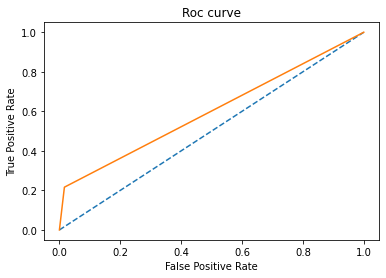

In [48]:
fpr,tpr,th=roc_curve(y_test,y_test_pred)
plt.plot([0,1],[0,1],'--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Roc curve")
plt.show()